<a href="https://colab.research.google.com/github/cescudero27/4220-Data-Mining-Machine-Learning/blob/main/Lab1_Linear_Regression_Escudero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset:** This lab will use a dataset that represents water flow out of a dame versus change of water level. The dataset is uploaded in iLearn. You need to upload it to your Google Colab.

**Step-1: Import Libraries:** The first step in any project is to import the libraries we are going to use

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
#set default figure size
mpl.rcParams['figure.figsize'] = (12, 8)

Here, we imported:


*   Numpy for math operations.
*   Pandas to handle tabular data.
*   Matplotlib for visualizations.



**Step-2: Load the Data:** The next step is to load the data. While loading the data, let's also insert a column of ones to be the first column in the feature set. This column represents $X_0=1$, which will be multiplied by $\theta_0$.

In [ ]:
data = pd.read_csv('Lab1_dataset.csv')
data_train = data.loc[0:11,['X', 'y']]
data_test = data.loc[0:20,['Xtest', 'ytest']]
data_val = data.loc[0:20,['Xval', 'yval']]

# Include a column of 1s in X to represent X_0 that will be multiplied by theta_0
X_train = np.c_[np.ones_like(data_train['X']), data_train['X']]
y_train = np.c_[data_train['y']]

X_val = np.c_[np.ones_like(data_val['Xval']), data_val['Xval']]
y_val = np.c_[data_val['yval']]

X_test = np.c_[np.ones_like(data_test['Xtest']), data_test['Xtest']]
y_test = np.c_[data_test['ytest']]

Here, we did the following:


*   Read our data from the CSV file
*   Extract the train and test data from the CSV file. In this dataset, the data is already split into columns: train data labeled X and y (12 samples), test data labeled Xtest and ytest (21 samples), and validation data Xval and yval (21 samples).
*   Next, we handeled the train, test, and validation data. For each subset, we separated the features and labeles. In the features, we added a column of 1s at the beginning. This is needed for dot product $X . \theta$ for vector $\theta$ and matrix $X$.



*Explore the data:* Let's look at the data:

In [ ]:
print('X_train:')
print(X_train)
print('y_train:')
print(y_train)

X_train:
[[  1.     -15.9368]
 [  1.     -29.153 ]
 [  1.      36.1895]
 [  1.      37.4922]
 [  1.     -48.0588]
 [  1.      -8.9415]
 [  1.      15.3078]
 [  1.     -34.7063]
 [  1.       1.3892]
 [  1.     -44.3838]
 [  1.       7.0135]
 [  1.      22.7627]]
y_train:
[[ 2.1343]
 [ 1.1733]
 [34.3591]
 [36.838 ]
 [ 2.809 ]
 [ 2.1211]
 [14.7103]
 [ 2.6142]
 [ 3.7402]
 [ 3.7317]
 [ 7.6277]
 [22.7524]]


*Plot the data:* It is often useful to create a scatter plot of your data. Sometimes this helps identify the best polynomial order that fits your data. For that, we will create a function that we can use to plot our data. Here, we will create a general plot function that we can use to plot the data and later when we find the optimal model, we can also use the function to plot the optimal model on the same Figure with that data. The if condition (line 8) in this function is intended to help us later when we try to plot the developed linear regression model on the scatter plot of the training data. Note here: once we know our model  $\theta_0 + \theta_1 X_1$, we will substitute by a rane of $X$  to find our line and plot it on the data.

In [ ]:
def plotData(X, y, theta = np.array(([0],[0])), reg = 0):
    plt.figure(figsize=(12, 8))
    plt.scatter(X[:, 1], y, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
    plt.grid(True)
    plt.title('Water Flow Data')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    if theta.any() != 0:
        plt.plot(np.linspace(X.min(), X.max()), theta[0] + theta[1] * np.linspace(X.min(), X.max()),
                                                 label = 'Optimized linear fit')
        plt.title('Water Data: Linear Fit')

    plt.legend()

Now, let's use the plot function:

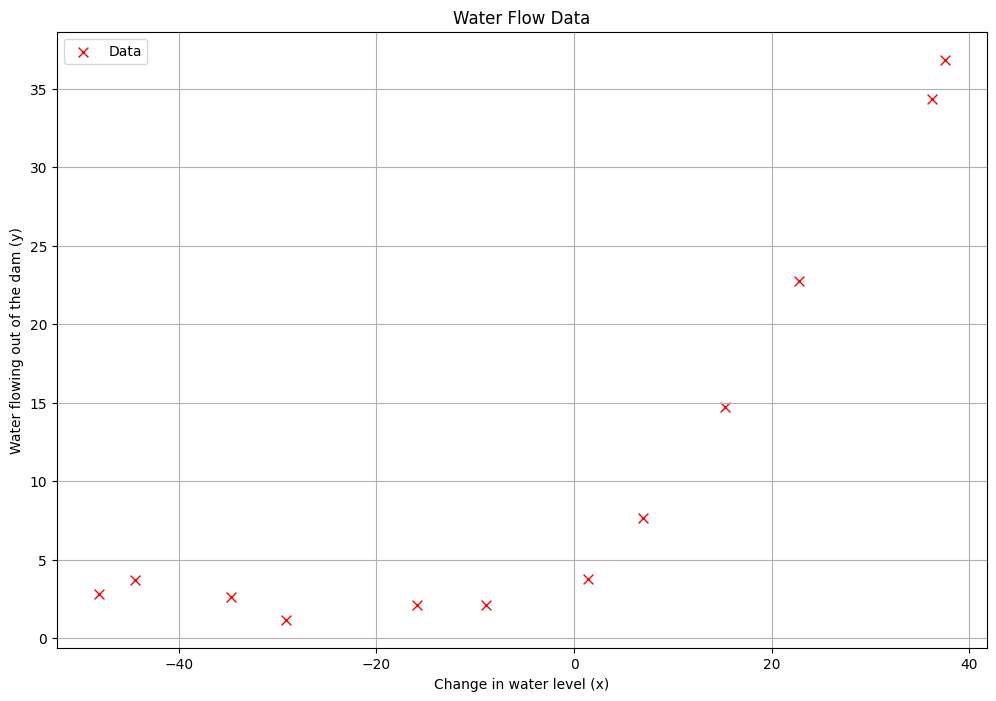

In [ ]:
plotData(X_train, y_train)

**Step-3: Implement a Linear Regression Model:**

*Step-3.1: Cost Function and Gradient:* Let's implement a function to calculate the cost $J$. This will be useful later in most of our next steps. This function will return the cost value. This is a general implementation that works even for regularized functions.

In [ ]:
def cost(theta, X, y, reg = 0):
    m = y.size
    f = np.dot(X,theta).reshape((m, 1))
    J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
    J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
    J = J1 + J2
    grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()
    return J, grad

See slide 22 for the expression of the cost function. In the general function above, if you set the reg to $0$ no regularization is applied. Otherwise, you apply regularization. We also calculate the gradient of the cost function (as in slide 22).

*Step-3.2: Gradient Descent Algorithm:* Next, we implement the iterations of the gradient descent.  

In [ ]:
def gradient_descent(alpha, x, y, numIterations):
    epsilon = 1e-3
    theta = np.ones(2)
    J_prev = float('inf') # initalize a value to get the previous J
    iter = 0
    J_list=[]

    while True:
      if iter > numIterations:

        break

      J,grad = cost(theta, x, y, reg=0)

      print(iter, J)

      J_list.append(J)

      #checking Convergence
      if abs(J -J_prev) <= epsilon:
        break # exits because condition has been met

      theta = theta -alpha * grad #update theta
      J_prev = J #Updating the previous cost
      iter += 1 #increment the iter counter

    if iter > numIterations:
      plt.plot(range(iter),J_list)
    else:
      plt.plot(range(iter+1),J_list)
    plt.xlabel(iter)
    plt.ylabel(J)
    plt.show()

    return theta

The line before the for loop is where we initialize $\theta$ - here, we intialize $\theta$ as ones, i.e., intially $\theta_0 = 1$ and $\theta_1 = 1$. The for loop represents our iterations. In each iteration, we call the cost function to calculate the gradient and then we update the values of $\theta_0$ and $\theta_1$ (i.e., the vector $\theta$) with step size $\alpha$.  

Let's use the gradient descent function to get $\theta$:

0 303.95212832416655
1 1483678.591102604
2 10441755606.062258
3 73490408080396.95
4 5.1723487117430534e+17
5 3.640365034662035e+21
6 2.562135371016774e+25
7 1.8032635729962463e+29
8 1.269159916560044e+33
9 8.932509467411347e+36
10 6.286814162998229e+40
11 4.4247400424563134e+44
12 3.1141885119726924e+48
13 2.1918056190977795e+52
14 1.5426207673168392e+56
15 1.0857161835075267e+60
16 7.641409062451963e+63
17 5.3781212205093896e+67
18 3.785190352473064e+71
19 2.6640652780039266e+75
20 1.875003142399203e+79
21 1.3196511410715154e+83
22 9.287873149391114e+86
23 6.536923657652148e+90
24 4.600770296779267e+94
25 3.2380808515253353e+98
26 2.279002628832634e+102
27 1.6039911356072008e+106
28 1.1289094319405534e+110
29 7.9454086573982e+113
30 5.59208001518253e+117
31 3.9357772827815687e+121
32 2.770050281398531e+125
33 1.949596740406293e+129
34 1.372151067338693e+133
35 9.657374330685137e+136
36 6.796983304751185e+140
37 4.783803595380444e+144
38 3.366902023016311e+148
39 2.369668613389175e+152

<ipython-input-43-8f3afc133d4b>:4: RuntimeWarning: overflow encountered in square
  J1 = (1 / (2 * m)) * np.sum(np.square(f - y))
<ipython-input-43-8f3afc133d4b>:5: RuntimeWarning: invalid value encountered in scalar multiply
  J2 = (reg / (2 * m)) * theta[1:].T.dot(theta[1:])
<ipython-input-43-8f3afc133d4b>:7: RuntimeWarning: invalid value encountered in multiply
  grad = ((1 / m)*(X.T.dot(f - y)) + (reg / m) * np.r_[[[0]], theta[1:].reshape(-1, 1)]).ravel()


Streaming output truncated to the last 5000 lines.
5001 nan
5002 nan
5003 nan
5004 nan
5005 nan
5006 nan
5007 nan
5008 nan
5009 nan
5010 nan
5011 nan
5012 nan
5013 nan
5014 nan
5015 nan
5016 nan
5017 nan
5018 nan
5019 nan
5020 nan
5021 nan
5022 nan
5023 nan
5024 nan
5025 nan
5026 nan
5027 nan
5028 nan
5029 nan
5030 nan
5031 nan
5032 nan
5033 nan
5034 nan
5035 nan
5036 nan
5037 nan
5038 nan
5039 nan
5040 nan
5041 nan
5042 nan
5043 nan
5044 nan
5045 nan
5046 nan
5047 nan
5048 nan
5049 nan
5050 nan
5051 nan
5052 nan
5053 nan
5054 nan
5055 nan
5056 nan
5057 nan
5058 nan
5059 nan
5060 nan
5061 nan
5062 nan
5063 nan
5064 nan
5065 nan
5066 nan
5067 nan
5068 nan
5069 nan
5070 nan
5071 nan
5072 nan
5073 nan
5074 nan
5075 nan
5076 nan
5077 nan
5078 nan
5079 nan
5080 nan
5081 nan
5082 nan
5083 nan
5084 nan
5085 nan
5086 nan
5087 nan
5088 nan
5089 nan
5090 nan
5091 nan
5092 nan
5093 nan
5094 nan
5095 nan
5096 nan
5097 nan
5098 nan
5099 nan
5100 nan
5101 nan
5102 nan
5103 nan
5104 nan
5105 nan
5106

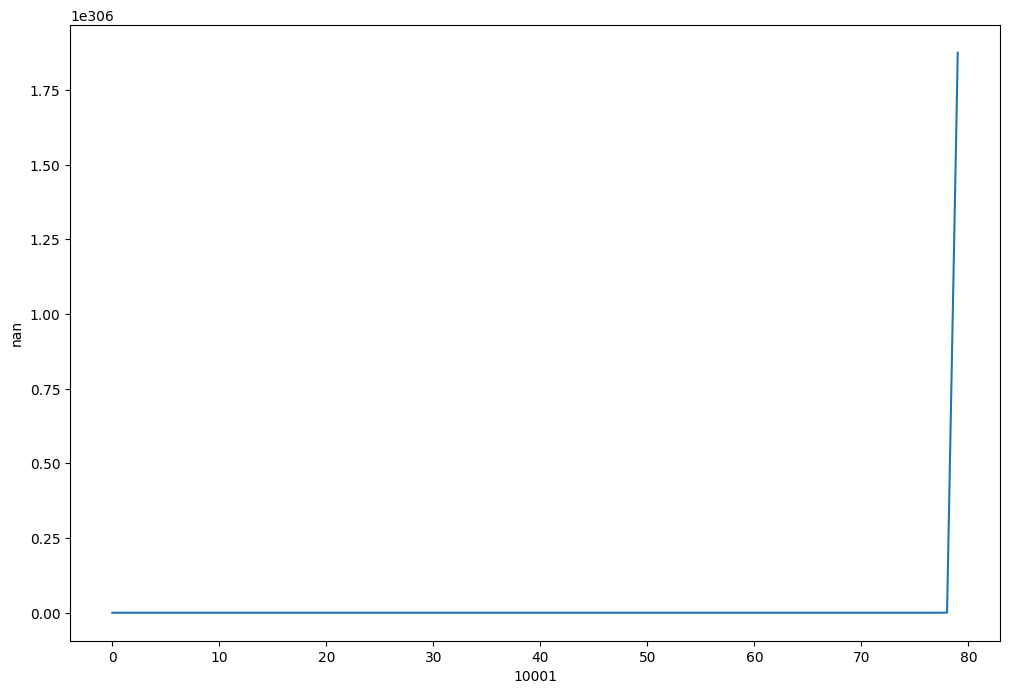

In [ ]:
#(a) alpha = 0.1
alpha1 = 0.1 # learning rate
theta1 = gradient_descent(alpha1, X_train, y_train, 10000)

**(a) alpha = 0.1 Results**

This alpha steps through too quickly as we reach infinity by the 80th iteration. We need to decrease the step size in order to converge at the approriate rate

0 303.95212832416655
1 97.83089178216704
2 92.99331842560191
3 92.7493951937704
4 92.61056007053415
5 92.47438139171504
6 92.33852111647849
7 92.20292539000083
8 92.06759248465946
9 91.93252186336616
10 91.7977130171658
11 91.6631654387079
12 91.5288786216394
13 91.39485206058879
14 91.26108525116412
15 91.12757768995093
16 90.99432887451044
17 90.8613383033776
18 90.72860547605922
19 90.5961298930321
20 90.46391105574122
21 90.33194846659768
22 90.20024162897698
23 90.06879004721716
24 89.9375932266168
25 89.8066506734333
26 89.67596189488094
27 89.54552639912905
28 89.41534369530015
29 89.28541329346815
30 89.15573470465638
31 89.02630744083595
32 88.89713101492373
33 88.76820494078058
34 88.63952873320956
35 88.51110190795404
36 88.38292398169597
37 88.25499447205391
38 88.12731289758138
39 87.99987877776493
40 87.8726916330224
41 87.74575098470109
42 87.61905635507588
43 87.49260726734764
44 87.36640324564122
45 87.24044381500376
46 87.11472850140292
47 86.98925683172502
48 86.8640

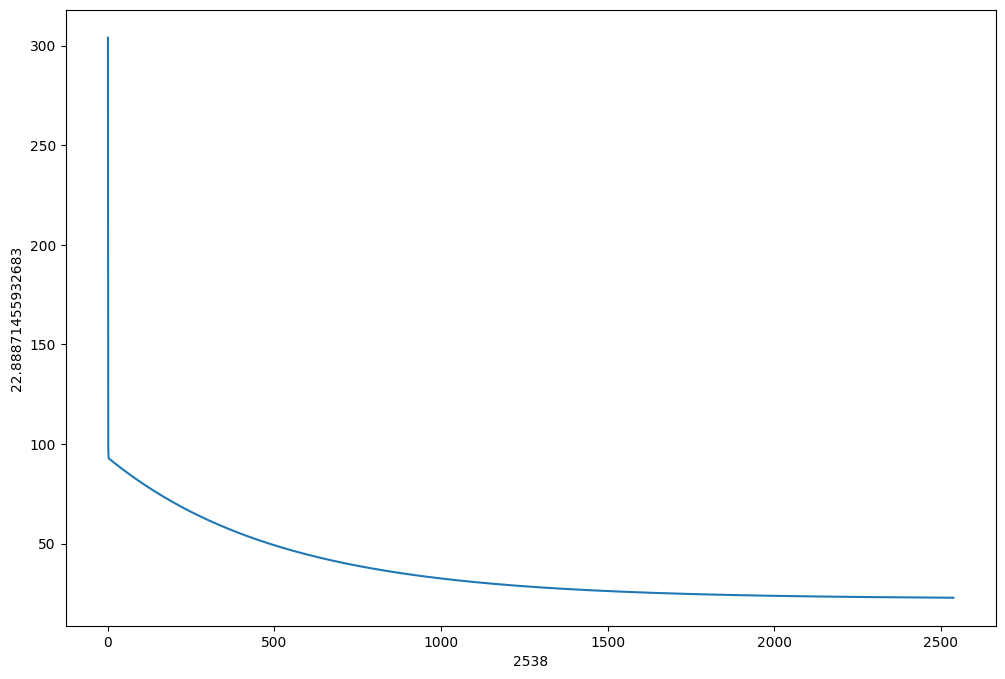

In [ ]:
#(b) alpha = 0.001
alpha = 0.001 # learning rate
theta = gradient_descent(alpha, X_train, y_train, 10000)



**BEST ALPHA STEP SIZE**


**(b) alpha = 0.001 Results**

This one converges at a quick rate and terminates which indicates to us that it will be the best step size



Streaming output truncated to the last 5000 lines.
5001 49.21375703593129
5002 49.208553037236896
5003 49.203350047549335
5004 49.19814806667296
5005 49.192947094412155
5006 49.18774713057139
5007 49.182548174955116
5008 49.17735022736787
5009 49.172153287614165
5010 49.16695735549863
5011 49.16176243082589
5012 49.15656851340058
5013 49.15137560302743
5014 49.1461836995112
5015 49.14099280265664
5016 49.135802912268566
5017 49.13061402815184
5018 49.12542615011137
5019 49.12023927795207
5020 49.11505341147891
5021 49.10986855049692
5022 49.1046846948111
5023 49.09950184422659
5024 49.09431999854846
5025 49.08913915758189
5026 49.08395932113206
5027 49.078780489004245
5028 49.07360266100367
5029 49.06842583693566
5030 49.063250016605565
5031 49.05807519981878
5032 49.0529013863807
5033 49.04772857609681
5034 49.04255676877259
5035 49.03738596421358
5036 49.03221616222537
5037 49.027047362613544
5038 49.02187956518379
5039 49.01671276974174
5040 49.01154697609317
5041 49.0063821840438
5

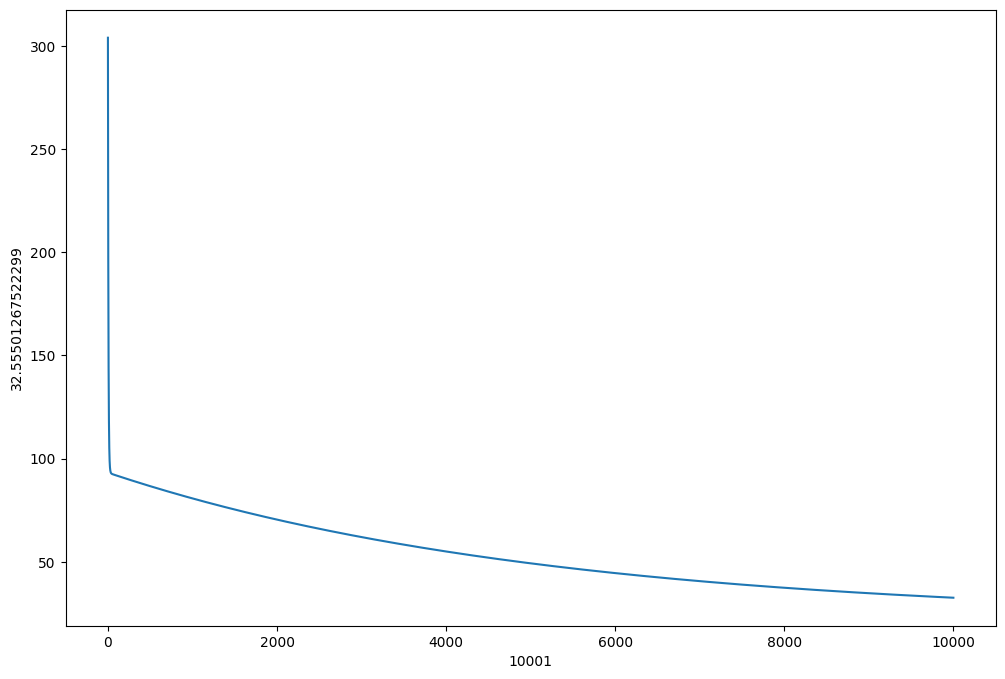

In [ ]:
#(c) alpha = 0.0001
alpha2 = 0.0001 # learning rate
theta2 = gradient_descent(alpha2, X_train, y_train, 10000)


***(c) alpha = 0.0001 Results***

This alpha goes through the whole 10000 iterations and converges but it could converge faster. If we had gone with a bigger step size then it would have converged quicker.

As you can see, $\theta$ has converged. In your assignment, you will plot the cost value $J$ versus the number of iterations and you will see that it gets minimized over the steps. Also, you will modify this implementation from a for loop to a while loop so you don't waste iterations if you already converged (see slide 11).

*Step-3.3: Plot the Data and the Model:* Now, Let's plot the linear regression model on our training data

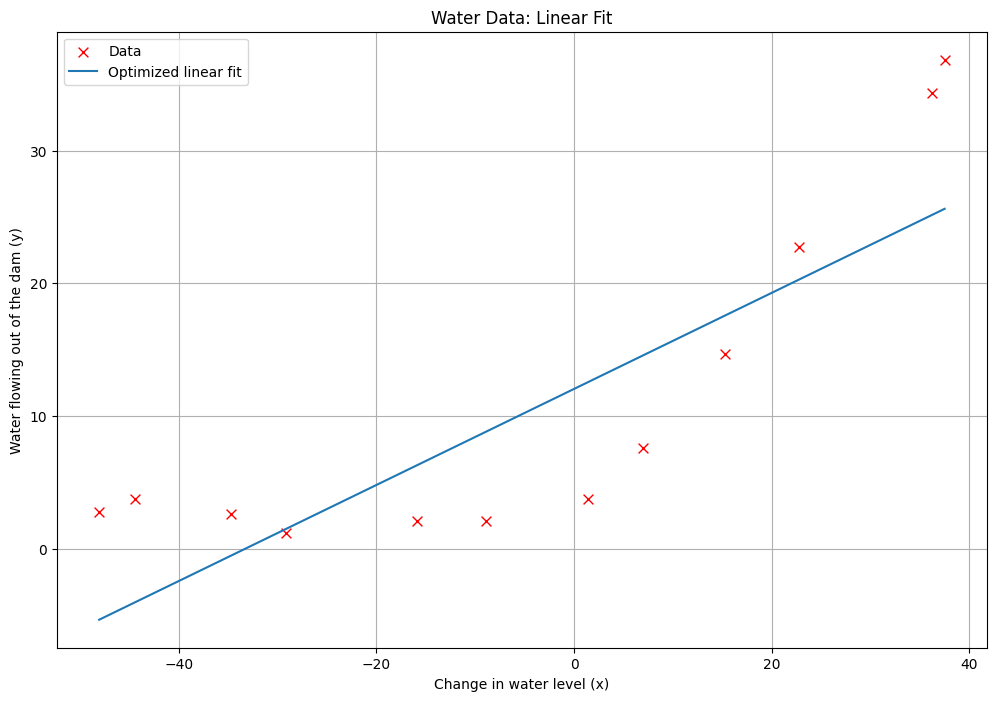

In [ ]:
plotData(X_train, y_train, theta)

**Another Way to Find the Model Parameters:** In Step-3.2 (as in the lecture), we found the model parameters $\theta$ using Gradient Descent Algorithm. Here, we will try another way to find the model parameters. Remember that finding the model parameters requires solving $\min_{\theta} J$. There are built-in functions in python that can solve minimization problems (instead of using Gradient Descent). We will try this here.

In [ ]:
from scipy.optimize import minimize
def optimalTheta(theta, X, y, reg = 0):
    #Nelder-Mead yields best fit
    res = minimize(fun = cost, x0 = theta, args = (X, y, reg), method = 'Nelder-Mead', jac = True)
    return res.x

We will use the Nelder-Mead solver to minimize the cost function. The function definition above takes initial theta, the training data (features and labels), and the regularization value, and results in the optimal theta that minimizes the cost function. This is also a iterative optimization method, I wanted to show you that it does exactly what we do in Gradeitn Descent.

Then, we use our new function to find $\theta$

In [ ]:
initial_theta = np.ones((X_train.shape[1]))
print(initial_theta)

[1. 1.]


In [ ]:
initial_theta = np.ones((X_train.shape[1]))
opt_theta = optimalTheta(initial_theta, X_train, y_train)
print("Optimized theta: {0}".format(opt_theta))

Optimized theta: [13.0879157   0.36777795]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


In [ ]:
#importing now to use in Question 2 (a)
from sklearn import linear_model

lr = linear_model.LinearRegression()

lr.fit(X_train[:,1].reshape(-1,1),y_train.ravel())


LinearRegression()

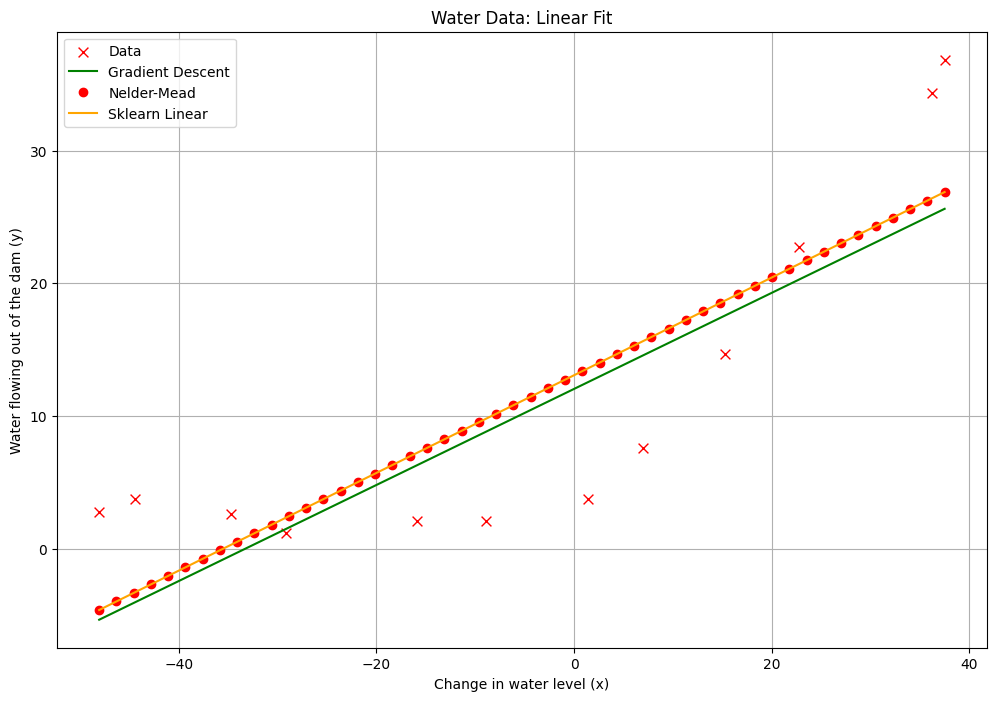

In [ ]:
#Question 2 (b)

plt.figure(figsize=(12, 8))
plt.scatter(X_train[:, 1], y_train, s = 50, c = 'red', marker = 'x', linewidths = 1, label = 'Data')
plt.grid(True)
plt.title('Water Flow Data')
plt.xlabel('Change in water level (x)')
plt.ylabel('Water flowing out of the dam (y)')
if theta.any() != 0:
  plt.plot(np.linspace(X_train.min(), X_train.max()), theta[0] + theta[1] * np.linspace(X_train.min(), X_train.max()),'-', c='green', label = 'Gradient Descent')
  plt.plot(np.linspace(X_train.min(), X_train.max()), opt_theta[0] + opt_theta[1] * np.linspace(X_train.min(), X_train.max()),'o', c='red', label = 'Nelder-Mead')
  plt.plot(np.linspace(X_train.min(), X_train.max()), lr.intercept_+ lr.coef_ * np.linspace(X_train.min(), X_train.max()),'-', c='orange', label = 'Sklearn Linear')
  plt.title('Water Data: Linear Fit')

plt.legend()

**Results**

As we can see the Gradient Descent gives us a result that is still linear and nearly identical to the plot below. The difference is that the Nelder-Mead and Sklearn Linear function are identical, now as discussed in class this could just be a case of us getting lucky with the model.


And we plot our model

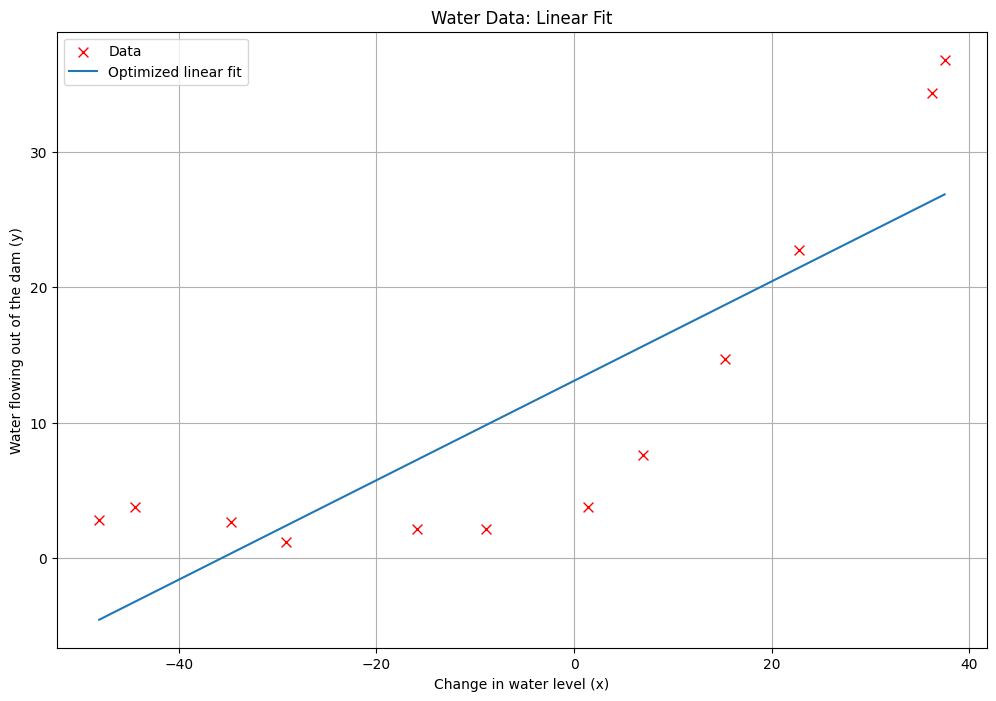

In [ ]:
plotData(X_train, y_train, opt_theta)

Note that this result is identical to the one we got using the Gradient Descent method. Both technqiues minimize the cost function to find $\theta$.

*Step-3.4: Learning Curves:* Let's implement a function to plot the learning curves. We will do a for loop on the number of training examples. Each time, we will find the optimal $\theta$ values using the current set of train data, calculate the cost function (error) on train and validation data, and save the train and validation errors in arrays to plot them.  

In [ ]:
def plotLearningCurve(theta, X, y, Xval, yval, reg = 0):
    m = y.size

    error_train = np.zeros((m, 1))
    error_val = np.zeros((m, 1))

    example_num = np.arange(1, (X.shape[0] + 1))
    for i in np.arange(m):

        opt_theta = optimalTheta(theta, X[:i + 1], y[:i + 1], reg)
        error_train[i] = cost(opt_theta, X[:i + 1], y[:i + 1], reg)[0]
        error_val[i] = cost(opt_theta, Xval, yval, reg)[0]

    plt.figure(figsize = (12, 8))
    plt.plot(example_num, error_train, label = 'Training Error')
    plt.plot(example_num, error_val, label = 'Validation Error')
    plt.title('Learning Curve: No Regularization')
    if reg != 0:
        plt.title('Learning Curve: Lambda = {0}'.format(reg))
    plt.xlabel('Number of training examples')
    plt.ylabel('Mean Square Error')
    plt.legend()
    plt.grid(True)

Here:

*   The first line learns the number of examples.
*   The next two lines create empty arrays to store the train and validation errors.
*   The fourth line finds a vector of number of examples to be considered in each iteration of the for loop. The result of this line will look like this: [1 2 3 4 ... 12]. So, in the for loop, we will consider: 1 training example, then two training examples, then three training examples, etc. to plot the learning curves (see slide 18, the learning curves plot the train and validation errors versus the number of training exmaples).
*   In each iteration of the for loop: (a) we find the optimal parameters $\theta$ given the current number of considered training examples - this optimal $\theta$ changes as we increase the number of examples, (b) calculate the training and validation errors (by substituting in the cost function expression using the optimal $\theta$ and examples to get the predicted label while consodering the actual label). We fill in these errors over the iterations of the for loop and plot the error values versus the number of training examples.   



Now, let's plot the learning curves

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


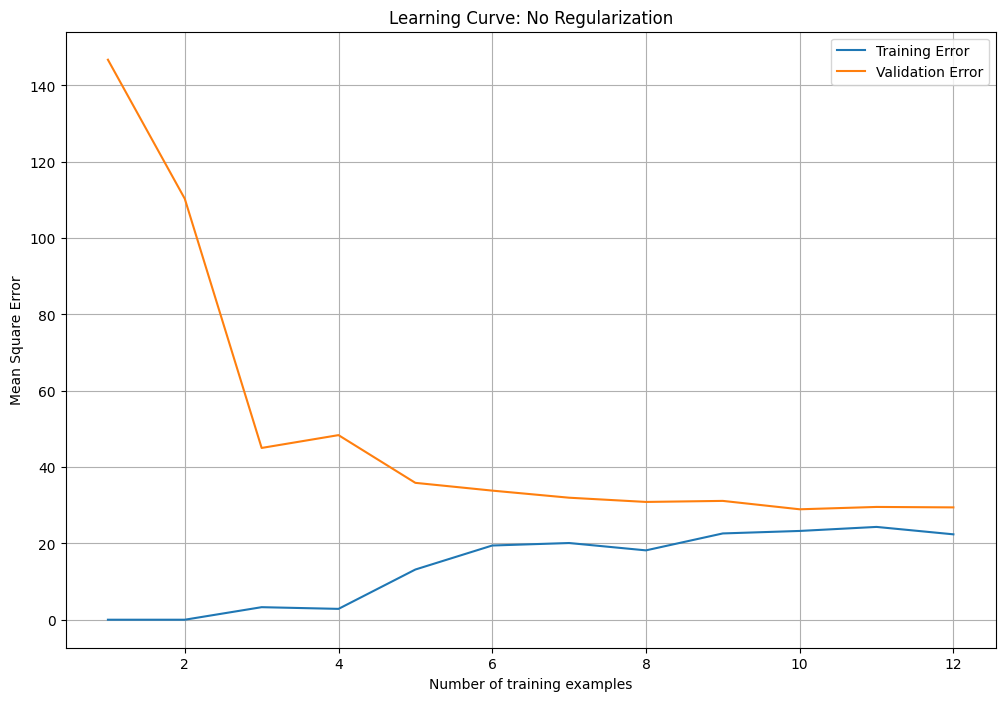

In [ ]:
initial_theta = np.ones((X_train.shape[1]))
plotLearningCurve(initial_theta, X_train, y_train, X_val, y_val)

In [ ]:
#Question 2 (c)
from sklearn.metrics import mean_squared_error

In [ ]:
y_pred = lr.predict(X_test[:,1].reshape(-1,1))
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error = ",mse)

Mean Squared Error =  65.01148977037029


***Polynomial Regression and Regularization:*** Let's implement a feature mapping and scaling function. It will take X append to it more columns to calculate more features (as a higher degree of X), then do a scaling. The scaling here is done using standardization. You can also do it using normalization.

In [ ]:
def polyFeatures(X, p):
    for i in np.arange(p):
        dim = i + 2
        X = np.insert(X, X.shape[1], np.power(X[:,1], dim), axis = 1)

    X_norm = X
    #column wise
    means = np.mean(X_norm, axis=0)
    X_norm[:, 1:] = X_norm[:, 1:] - means[1:]
    stds = np.std(X_norm, axis = 0)
    X_norm[:, 1:] = X_norm[:, 1:] / stds[1:]

    return X, X_norm

In [ ]:
degree = 8

Now, let's implement a function to develop a polynomial regression model. This function will first create the higher degree features, scale them, find the optimal $\theta$, and then plot the polynomial function on the scatter training data.

In [ ]:
poly_x_train = polyFeatures(X_train, degree)[1]
poly_x_val = polyFeatures(X_val,degree)[1]
poly_x_test = polyFeatures(X_test,degree)[1]



In [ ]:
initial_theta = np.ones((poly_x_train.shape[1]))

In [ ]:
#Reg = 0
def plotFit(X, y, degree, num_points, reg = 0):
    X_poly = polyFeatures(X, degree)[1]
    starting_theta = np.ones((X_poly.shape[1]))
    opt_theta = optimalTheta(starting_theta, X_poly, y, reg)
    x_range = np.linspace(-55, 50, num_points)
    x_range_poly = np.ones((num_points, 1))
    x_range_poly = np.insert(x_range_poly, x_range_poly.shape[1], x_range.T, axis = 1)
    x_range_poly = polyFeatures(x_range_poly, len(starting_theta)-2)[0]
    y_range = x_range_poly @ opt_theta
    plotData(X, y)
    plt.plot(x_range, y_range, "--", color = "blue", label = "Polynomial regression fit")
    plt.title('Polynomial Regression Fit: No Regularization')
    if reg != 0:
        plt.title('Polynomial Regression Fit: Lambda = {0}'.format(reg))
    plt.legend()

Here,


*   The first line get the polynomial features and scale them.
*   The second line specifies the intial theta values. Then, we calculate the optimal theta using the minimization function. The rest of the code lines plot the 8th degree polynomial curve over the data. Do you think this is a good model?  



**(a) Reg = 0 Results**

When we have no regularization the Validation data wants to converge with the Training Data but fails to do so as the training data provides no bias. This one would not a good model to use due to that fact.This model seems to follow the data exaclty which means that it's currently Overfitting

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


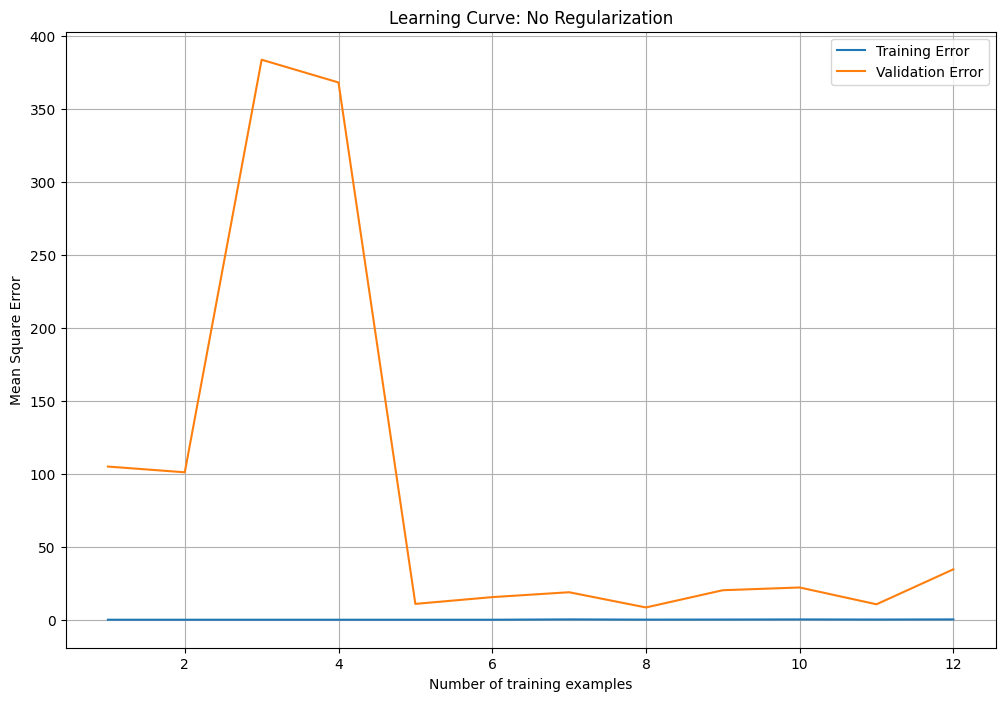

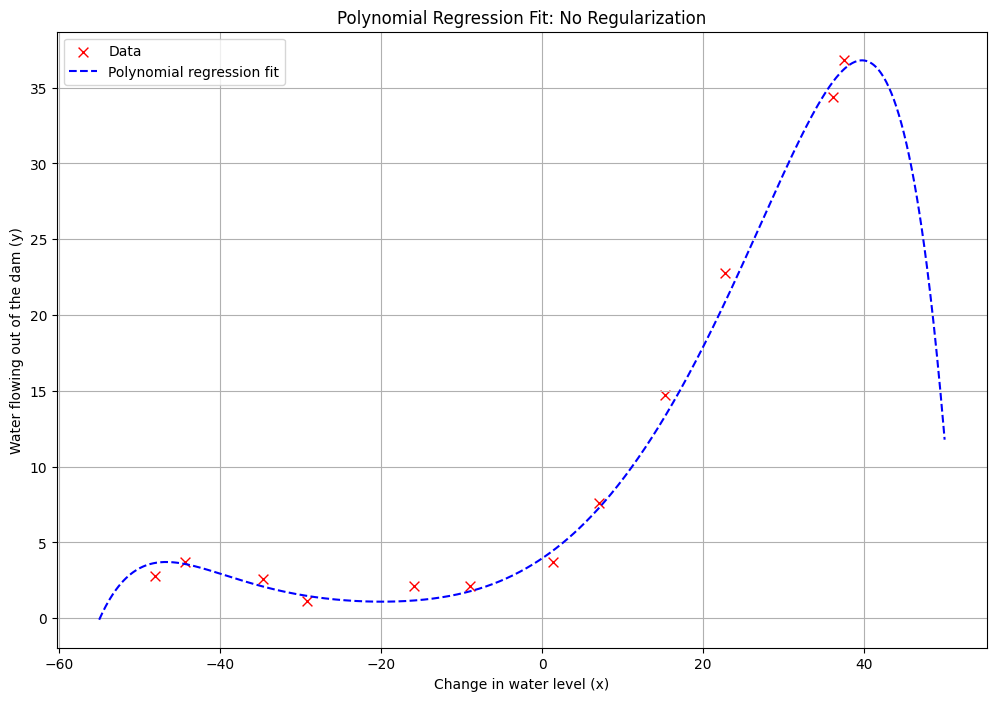

In [ ]:
#Reg = 0
plotLearningCurve(initial_theta,poly_x_train, y_train,poly_x_val, y_val, reg=0)
plotFit(X_train, y_train, degree, 1000, 0)

**(b) reg = 1 Results**

The validation and training data meet very quickly and go past each other but as the model learns it corrects itself to give us a low bias and a low variance. Out of the three graphs we have this one would be the best to use.With this model it hits around the data points but does not follow the data exactly. This is a good model that is neither underfitting or overfitting. This model would be the best out of the 3 to use.

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


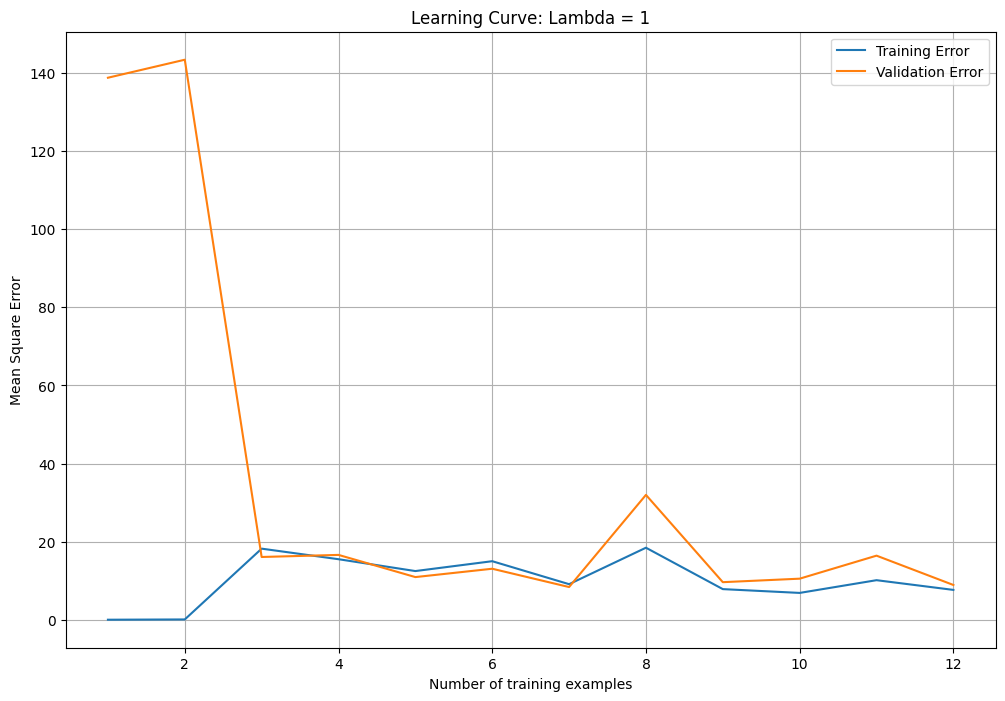

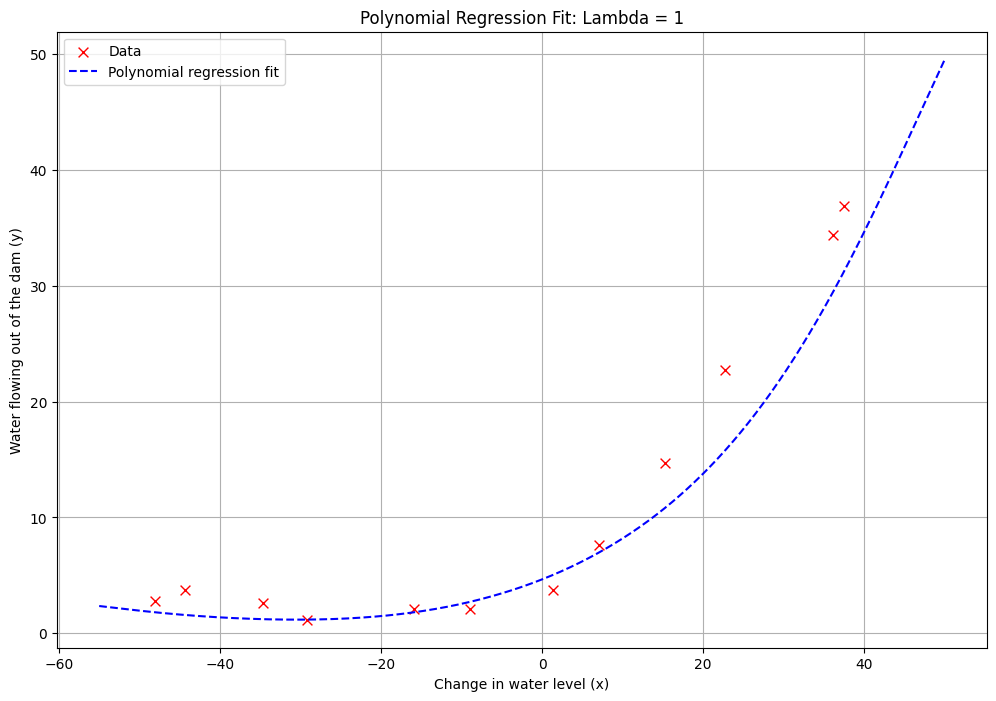

In [ ]:
#Reg = 1
plotLearningCurve(initial_theta,poly_x_train, y_train,poly_x_val, y_val, reg=1)
plotFit(X_train, y_train, degree, 1000, 1)

**(c) Reg = 100 Results**

The Training and Validation data in this model go past each other but as the model learns they try to converge but since they went past each other the bias is extremely high and the variance is extremely low or non-existent. This model is not passing through any of data points. The simplicity of the model makes it look to be that is underfitting

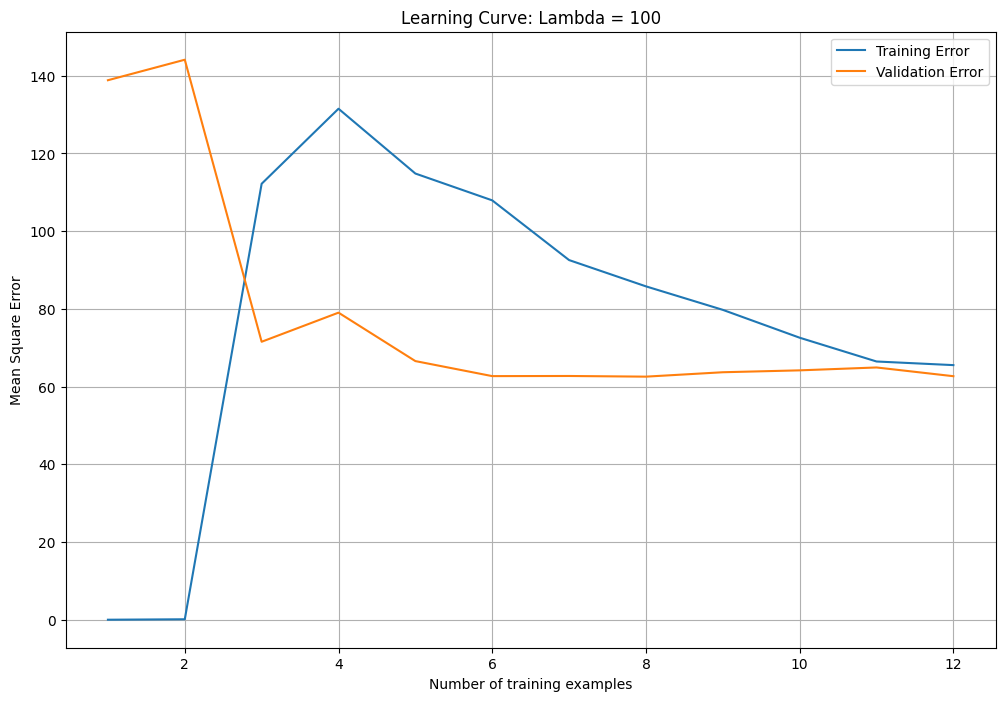

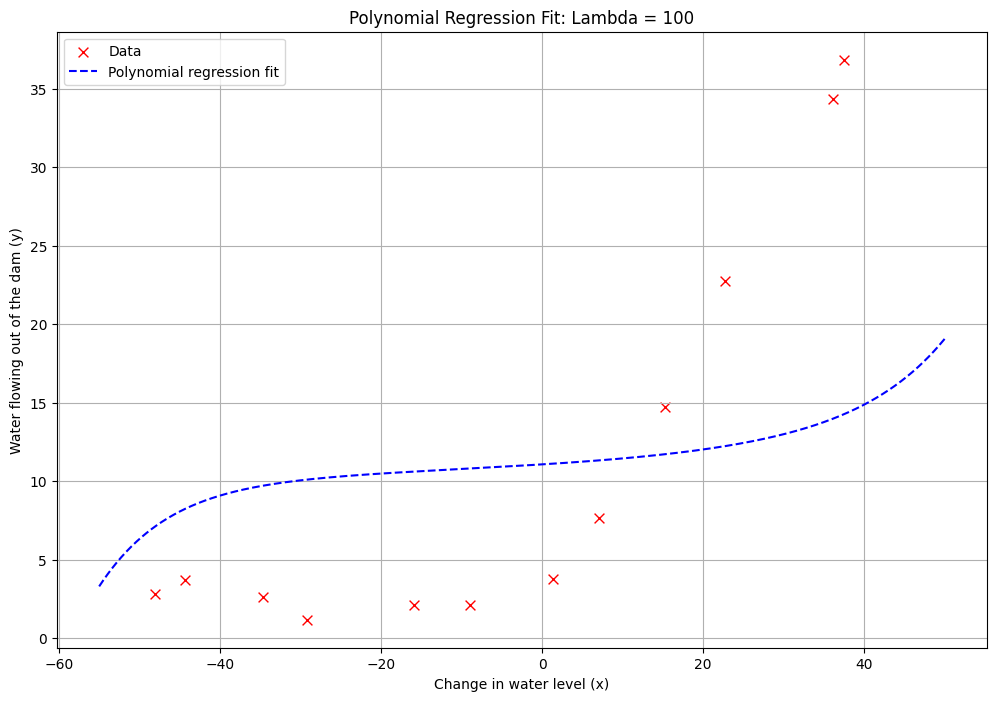

In [ ]:
#Reg = 100
plotLearningCurve(initial_theta,poly_x_train, y_train,poly_x_val, y_val, reg=100)
plotFit(X_train, y_train, degree, 1000, 100)

/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minimize.py:560: RuntimeWarning: Method Nelder-Mead does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


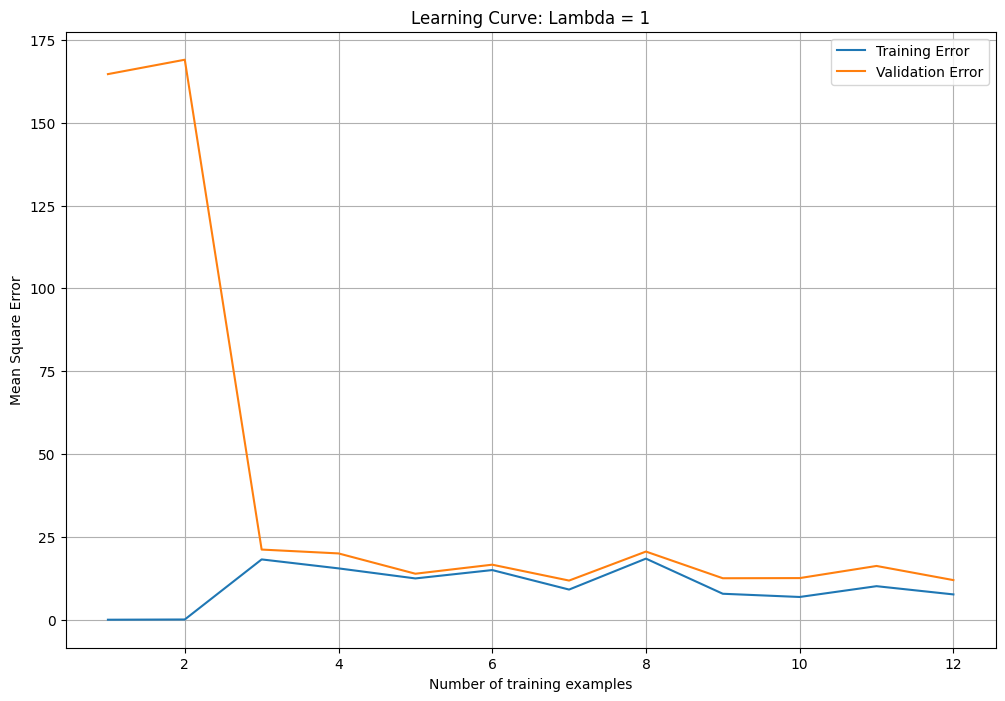

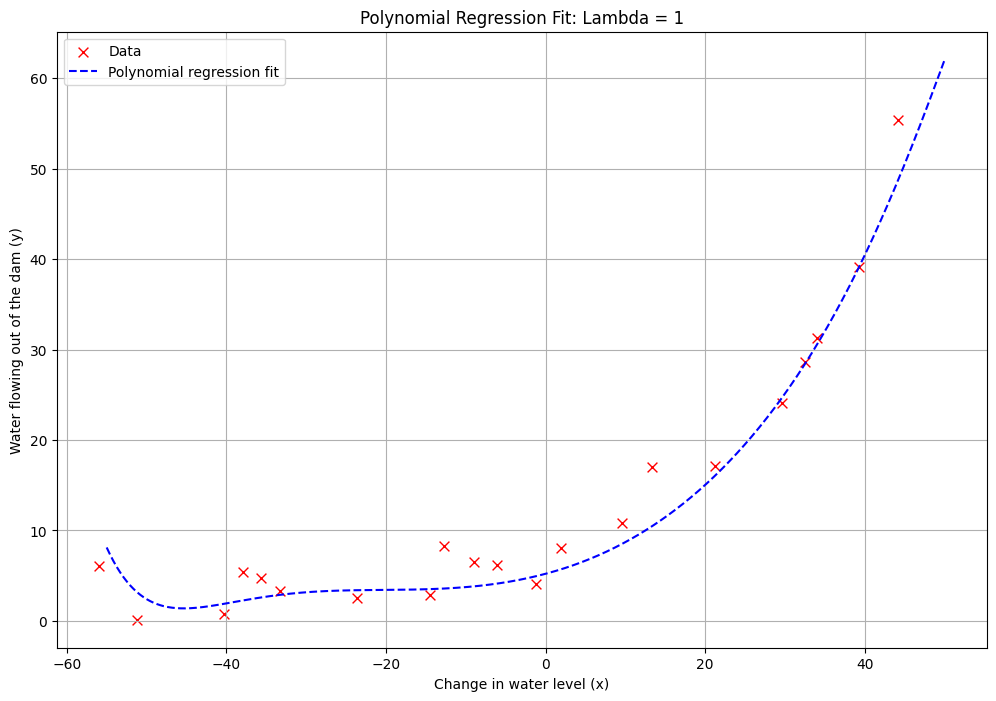

In [ ]:
#Question 3(b)
plotLearningCurve(initial_theta,poly_x_train, y_train,poly_x_test, y_test, reg=1)
plotFit(X_test, y_test, degree, 1000, 1)

In [ ]:
poly_theta = optimalTheta(initial_theta, poly_x_train,y_train,reg =1)
poly_cost = cost(poly_theta,poly_x_test,y_test,reg = 1)
print("Mean Squared Error = ", poly_cost[0])

Mean Squared Error =  11.957783663728144
